In [ ]:
url = 'https://en.wikipedia.org/wiki/Uber'

In [ ]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Uber - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9ff07ff9-4071-4f23-bc10-daf0db5d4da0","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Uber","wgTitle":"Uber","wgCurRevisionId":1121999904,"wgRevisionId":1121999904,"wgArticleId":722459,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Articles with short description","Short description is different from Wikidata","Wikipedia pending changes protected pages","Wikipedia articles needing clarification from July 2022"

In [ ]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Uber - Wikipedia Uber From Wikipedia, the free encyclopedia This is the  latest accepted revision ,  reviewed  on  15 November 2022 . Jump to navigation Jump to search American vehicle for hire, freight, food delivery, courier, and parcel delivery company For other uses, see  Über  and  Uber (disambiguation) . This article  may be  confusing or unclear  to readers . In particular, the article assumes prior knowledge. Is it a taxi? Do drivers hold a taxi permit? Are they insured? How is it different from a regular taxi?.  Please help  clarify the article . There might be a discussion about this on  the talk page . ( July 2022 )  ( Learn how and when to remove this template message ) Uber Technologies, Inc. Headquarters in San Francisco (2020) Formerly Ubercab (2009–2011) Type Public Traded as NYSE :  UBER Russell 1000  component Industry Transportation Mobility as a service Founded March 2009 ; 13 years ago  ( 2009-03 ) Founders Garrett Camp Travis Kalanick Headquarters San Francisco, 

In [ ]:
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('food delivery', 4.0),
 ('uber technologies', 4.0),
 ('san francisco', 4.0),
 ('dara khosrowshahi', 4.0),
 ('uber black', 4.0),
 ('southeast asia', 4.0),
 ('uber sold', 4.0),
 ('joby aviation', 4.0),
 ('uber ai', 4.0),
 ('bbc news', 4.0),
 ('washington post', 4.0),
 ('issn 0362-4331', 4.0),
 ('ars technica', 4.0),
 ('evade authorities', 4.0),
 ("^ o'brien", 3.991935483870968),
 ('^ lacy', 3.991935483870968),
 ('^ conger', 3.991935483870968),
 ('^ lee', 3.991935483870968),
 ('^ griswold', 3.991935483870968),
 ('^ isaac', 3.991935483870968),
 ('york times', 3.8823529411764706),
 ('press release', 3.833333333333333),
 ('ryan graves', 3.8),
 ('climate change', 3.8),
 ('^ hawkins', 3.791935483870968),
 ('business wire', 3.7857142857142856),
 ('business insider', 3.7857142857142856),
 ('bloomberg news', 3.75),
 ('data breach', 3.7142857142857144),
 ('travis kalanick', 3.625),
 ('business', 1.7857142857142858),
 ('kalanick', 1.625),
 ('services', 1.5555555555555556),
 ("uber's", 1.526315789

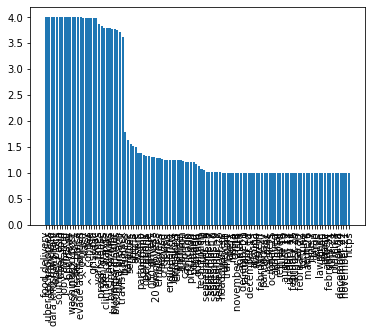

In [ ]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [ ]:
!{sys.executable} -m pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


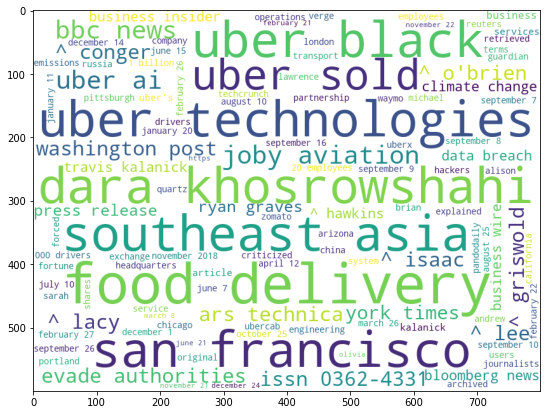

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

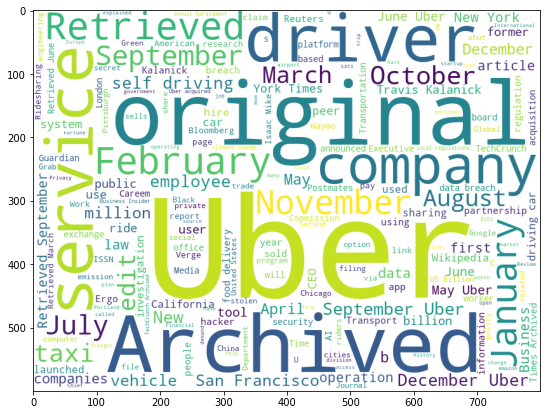

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))